In [52]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import numpy as np
import floatpy.readers.padeops_reader as por
import scripts.statistics as stats

def visualize_all(reader, step, plane, savename=''):
    reader.step = step
    fs = 12
    plist = ('u','v','w','rho','T','p')
    primitives = reader.readData(plist)
    colormap = ['inferno','afmhot','viridis','viridis','inferno','afmhot']
    
    fig, axarr = plt.subplots(2,3, figsize=(10,6), dpi=200) 
    counter = 0
    for irow in range(0,2):
        for icol in range(0,3):
            if plane=='xy': data2plot = np.transpose(primitives[counter][:,:,0])
            if plane=='xz': data2plot = np.transpose(primitives[counter][:,0,:])
            im = axarr[irow,icol].imshow( data2plot, 
                            cmap=colormap[counter], origin='lower', interpolation='none')#, aspect=1.)
            axarr[irow,icol].set_title(plist[counter], fontsize=fs, loc='center')
            axarr[irow,icol].set_xticks([])
            axarr[irow,icol].set_yticks([]) 
            if plane=='xy': plt.subplots_adjust(wspace=1,hspace=0.1)
            if plane=='xz': plt.subplots_adjust(wspace=0.3,hspace=0.1)

            # set the colorbar
            divider1 = make_axes_locatable(axarr[irow,icol])
            cax = divider1.append_axes('right', size='5%', pad=0.1)
            maxval = np.amax(primitives[counter]);
            minval = np.amin(primitives[counter]);
            cbar = plt.colorbar(im, cax,ticks=[minval, maxval])
            cbar.ax.set_yticklabels(['%0.2f'%(minval), '%0.2f'%(maxval)]) 
            cbar.ax.tick_params(labelsize=0.75*fs)
            counter += 1
    
    # set the overall title and save
    fig.suptitle('Time: {}'.format(reader.time),size=fs,y=1)
    if savename:
        plt.savefig(savename, dpi=500)#, bbox_inches='tight',pan_inches=0.5)
        plt.close(fig)
        print "Saved plot to ",savename
    

In [54]:
directory = "/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/512x362x128/"#more_t500/"
filename_prefix = directory+'/shearlayer_'
reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(False,False,True))
Nx,Ny,Nz,Lx,Ly,Lz,dx,dy,dz,kx,kz = stats.domain(reader,verbose=1)
steps = sorted(reader.steps)

print("Steps: {}".format(steps))

Domain size: 250.0 x 249.309394836 x 100.0
Grid size: 512 x 362 x 128
Grid res: 0.48828125 x 0.690612792969 x 0.78125
Steps: [0, 1, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


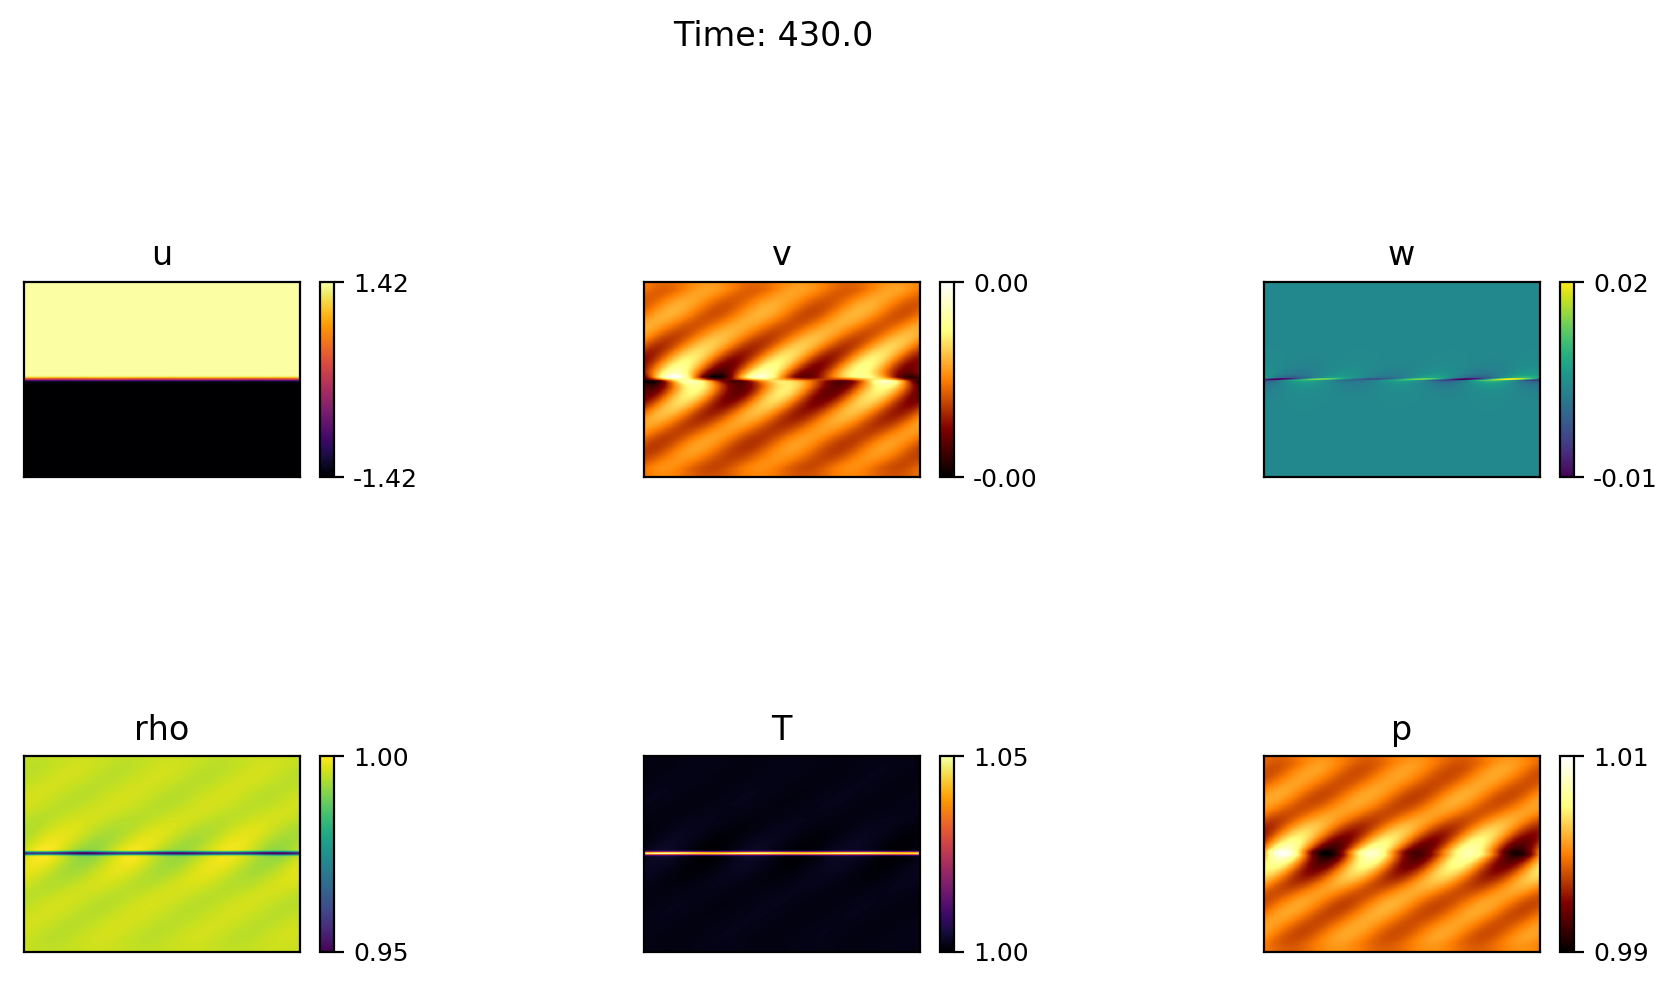

In [55]:
# plot a streamwise xy slice
zslice = Nz/2
reader.sub_domain = (0,0,zslice), (reader.domain_size[0]-1, reader.domain_size[1]-1, zslice)
step = 43
visualize_all(reader, step, plane='xy',savename="")


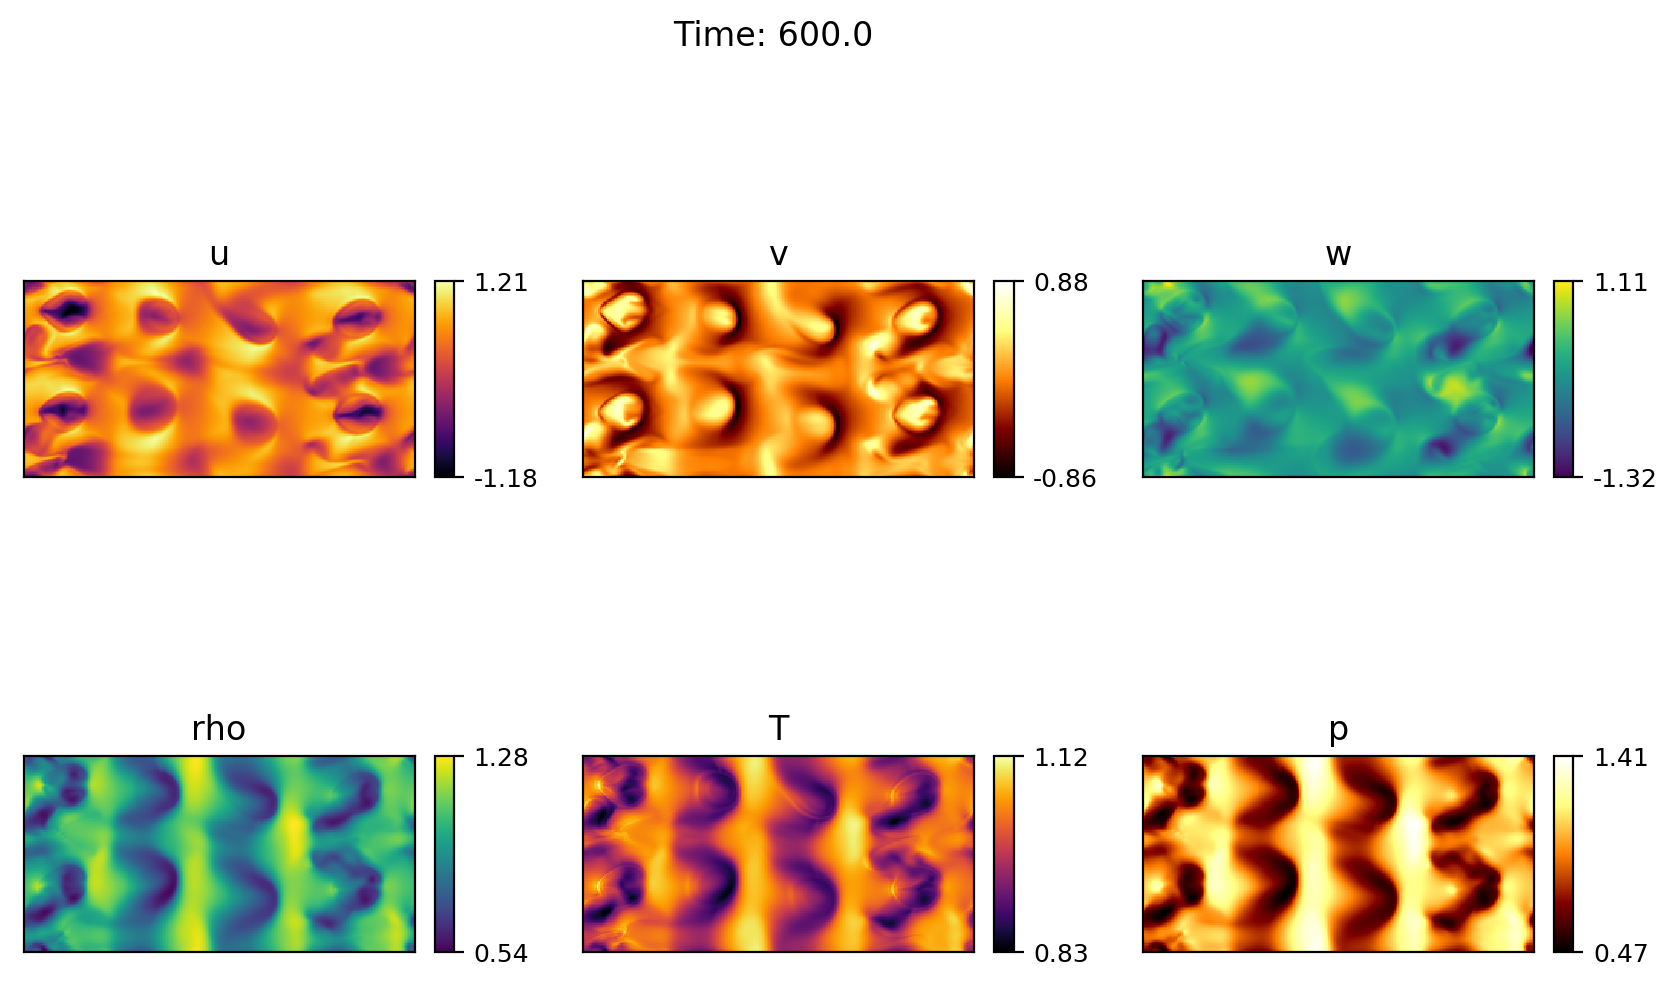

In [41]:
# plot an spanwise xz slice
yslice = Ny/2+4
reader.sub_domain = (0,yslice,0), (reader.domain_size[0]-1, yslice, reader.domain_size[2]-1)
step = 6
visualize_all(reader, step, plane='xz',savename="")

In [70]:
# plot all
for step in steps[7::]:
    savename = directory+"../img/slice_xy_%04d.png"%step
    visualize_all(reader, step=step, plane='xy',savename=savename)
    #savename = directory+"../img/slice_xz_%04d.png"%step
    #visualize_all(reader, step=step, plane='xz',savename=savename)

Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc07/rr8/256x384x128/no_tkeb/../img/slice_primitives_all_0032.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc07/rr8/256x384x128/no_tkeb/../img/slice_primitives_all_0033.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc07/rr8/256x384x128/no_tkeb/../img/slice_primitives_all_0034.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc07/rr8/256x384x128/no_tkeb/../img/slice_primitives_all_0035.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc07/rr8/256x384x128/no_tkeb/../img/slice_primitives_all_0036.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc07/rr8/256x384x128/no_tkeb/../img/slice_primitives_all_0037.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc07/rr8/256x384x128/no_tkeb/../img/slice_primitives_all_0038.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc